In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## NumPy


In [2]:
sum_arr = np.array([6,3,4]) + np.array([4,5,5])
print(sum_arr)
print(type(sum_arr))
print(np.mean(sum_arr))
ones = np.array([[1,1],[1,1]])
twos = np.array([[2,2],[2,2]])
print(ones+twos)

[10  8  9]
<type 'numpy.ndarray'>
9.0
[[3 3]
 [3 3]]


In [3]:
odd = sum_arr % 2 == 0
print(odd)
print(sum_arr[odd])

[ True  True False]
[10  8]


## Matplotlib

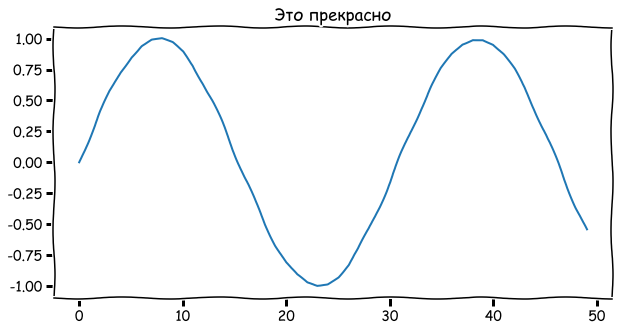

In [4]:
plt.xkcd()  # Да...
plt.figure(figsize=(10,5))
plt.plot(np.sin(np.linspace(0, 10)))
plt.title(u'Это прекрасно')
plt.show()

## Pandas

In [5]:
d = {'twitter': ["kozulya", "jack"], 'followers': [2555, 33333]}
pd.DataFrame(data=d)

,followers,twitter
0,2555,kozulya
1,33333,jack


## Пример чистых данных

In [6]:
air_quality = pd.read_csv('datasets/airquality.csv')
air_quality.head(4)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4


# Почему это удобно? 

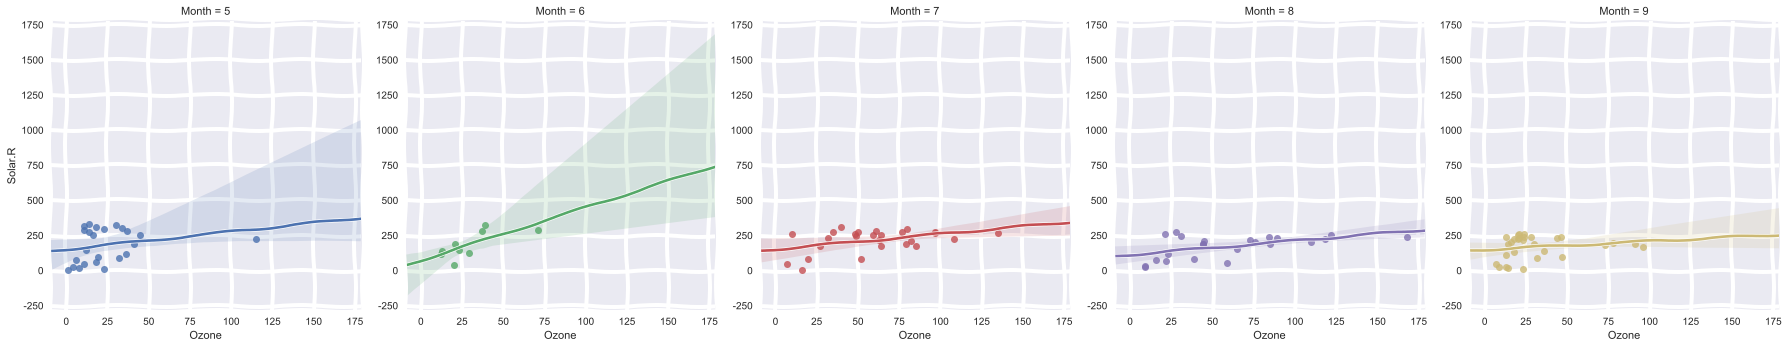

In [7]:
sns.set()
plt.figure(figsize=(20,5))
sns.lmplot(x="Ozone", y="Solar.R", hue="Month", col="Month",
           data=air_quality)
plt.show()

# Суровая реальность
Данные росстата 


In [8]:
prices = pd.read_excel('datasets/rosstat_prices.xlsx', header = 3, usecols=[1,2,3,4,5,6,7])
prices.head()

,февраль,март,апрель,май,июнь,июль,август
"Мясо индейки,кг",332.12,330.86,329.56,329.50,332.29,335.30,350.00
"Консервы мясные для детского питания, кг",717.73,717.23,719.30,717.01,716.91,717.62,717.27
"Креветки мороженые неразделанные, кг",664.94,664.40,667.03,665.73,667.46,666.32,666.11
"Кальмары мороженые,кг",309.60,311.69,315.18,318.57,323.32,325.37,324.00
"Какао, кг",692.68,711.63,712.49,2000.00,712.16,712.41,716.23


## Диагностируем проблемы

In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, Мясо индейки,кг to Яйца куриные, 10 шт.
Data columns (total 7 columns):
февраль    515 non-null float64
март       513 non-null float64
апрель     513 non-null float64
май        513 non-null float64
июнь       513 non-null float64
июль       513 non-null float64
август     513 non-null float64
dtypes: float64(7)
memory usage: 32.2+ KB


In [10]:
prices.columns

Index([u'февраль', u'март', u'апрель', u'май', u'июнь', u'июль', u'август'], dtype='object')

## Убираем лишнюю группировку

In [11]:
prices = prices.reset_index()
prices.head()

,index,февраль,март,апрель,май,июнь,июль,август
0,"Мясо индейки,кг",332.12,330.86,329.56,329.50,332.29,335.30,350.00
1,"Консервы мясные для детского питания, кг",717.73,717.23,719.30,717.01,716.91,717.62,717.27
2,"Креветки мороженые неразделанные, кг",664.94,664.40,667.03,665.73,667.46,666.32,666.11
3,"Кальмары мороженые,кг",309.60,311.69,315.18,318.57,323.32,325.37,324.00
4,"Какао, кг",692.68,711.63,712.49,2000.00,712.16,712.41,716.23


In [12]:
prices = prices.rename(index=str, columns={'index': u'наименование'})
prices.head()

,наименование,февраль,март,апрель,май,июнь,июль,август
0,"Мясо индейки,кг",332.12,330.86,329.56,329.50,332.29,335.30,350.00
1,"Консервы мясные для детского питания, кг",717.73,717.23,719.30,717.01,716.91,717.62,717.27
2,"Креветки мороженые неразделанные, кг",664.94,664.40,667.03,665.73,667.46,666.32,666.11
3,"Кальмары мороженые,кг",309.60,311.69,315.18,318.57,323.32,325.37,324.00
4,"Какао, кг",692.68,711.63,712.49,2000.00,712.16,712.41,716.23


## Слияние столбцов с помощью melt

In [13]:
prices = pd.melt(frame=prices, id_vars=u'наименование',var_name=u'месяц', value_name=u'цена',
                 value_vars=[u'февраль',u'март',u'апрель',u'май',u'июнь',u'июль',u'август'])

In [14]:
prices.head()

,наименование,месяц,цена
0,"Мясо индейки,кг",февраль,332.12
1,"Консервы мясные для детского питания, кг",февраль,717.73
2,"Креветки мороженые неразделанные, кг",февраль,664.94
3,"Кальмары мороженые,кг",февраль,309.60
4,"Какао, кг",февраль,692.68


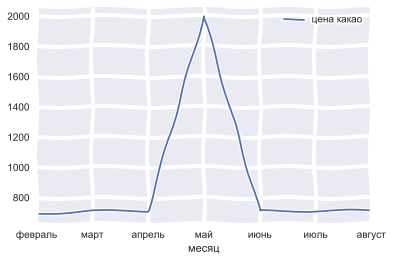

In [15]:
prices[prices[u'наименование']==u'Какао, кг'].plot(x=u'месяц',y=u'цена', label=u'цена какао')
plt.show()

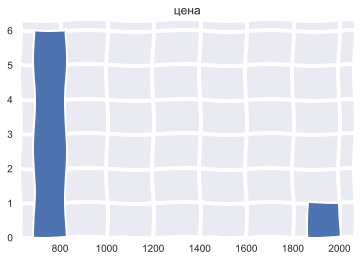

In [16]:
prices[prices[u'наименование']==u'Какао, кг'].hist()
plt.show()

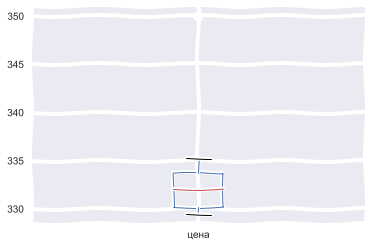

In [17]:
prices[prices[u'наименование']==u'Мясо индейки,кг'].boxplot(autorange=True)
plt.show()

## Замена на среднее

C:\Users\elena.savelieva\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\elena.savelieva\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


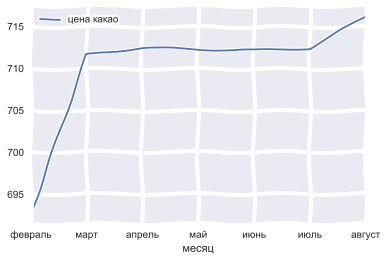

In [18]:
cocoa = prices.loc[prices[u'наименование']==u'Какао, кг']
median = cocoa.loc[cocoa[u'цена']<2000, u'цена'].median()
cocoa.loc[cocoa[u'цена'] == 2000,u'цена'] = np.nan
cocoa.fillna(median,inplace=True)
cocoa.plot(x=u'месяц',y=u'цена', label=u'цена какао')
plt.show()

## Удаляем все частично незаполненные наблюдения

Датасет - заявки на получение работы в НЙ


In [19]:
job_applications = pd.read_csv('datasets/dob_job_application_filings_subset.csv',low_memory=False)

In [20]:
job_applications.dropna(inplace=True)
job_applications.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate


## Дубликаты

Датасет - упрощенные убер-поездки

In [21]:
uber = pd.read_csv('datasets/nyc_uber_2014.csv')
uber[uber.duplicated()]

,Date/Time,Lat,Lon,Base
44,4/1/2014 5:44,40.7430,-74.0301,B02512
138,5/1/2014 3:28,40.7144,-74.0380,B02512
149,5/1/2014 4:17,40.7196,-74.0085,B02512
154,5/1/2014 4:28,40.7540,-73.9773,B02512
175,5/1/2014 5:27,40.7449,-73.9772,B02512
182,5/1/2014 5:38,40.7372,-74.0372,B02512
186,5/1/2014 5:40,40.7828,-73.9797,B02512
297,6/1/2014 6:51,40.7621,-73.9817,B02512
298,6/1/2014 6:51,40.7621,-73.9817,B02512


In [22]:
uber[uber.duplicated()]

,Date/Time,Lat,Lon,Base
44,4/1/2014 5:44,40.7430,-74.0301,B02512
138,5/1/2014 3:28,40.7144,-74.0380,B02512
149,5/1/2014 4:17,40.7196,-74.0085,B02512
154,5/1/2014 4:28,40.7540,-73.9773,B02512
175,5/1/2014 5:27,40.7449,-73.9772,B02512
182,5/1/2014 5:38,40.7372,-74.0372,B02512
186,5/1/2014 5:40,40.7828,-73.9797,B02512
297,6/1/2014 6:51,40.7621,-73.9817,B02512
298,6/1/2014 6:51,40.7621,-73.9817,B02512


In [23]:
uber.drop_duplicates(inplace=True)
uber[uber.duplicated()]

,Date/Time,Lat,Lon,Base


## Конвертация типов
Датасет - покемоны c Kaggle

In [24]:
pokemon = pd.read_csv('datasets/pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,"""False"""
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,"""False"""
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,"""False"""
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,"""False"""
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,"""False"""


In [25]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null object
dtypes: int64(9), object(4)
memory usage: 81.3+ KB


In [26]:
pokemon['Type 1'] = pokemon['Type 1'].astype('category')
pokemon['Type 2'] = pokemon['Type 1'].astype('category')
pokemon['Legendary'] = pokemon['Legendary'].astype('bool')
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null category
Type 2        800 non-null category
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(2), int64(9), object(1)
memory usage: 66.4+ KB


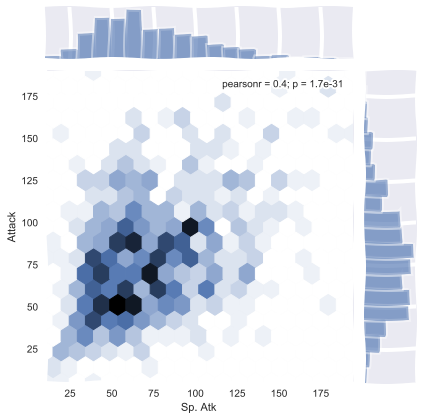

In [27]:
sns.set()
plt.clf()
sns.jointplot("Sp. Atk", "Attack", data=pokemon, kind="hex")
plt.figure(figsize=(20,5))
plt.show()

## Обработка строк, apply

In [28]:
ethereum = pd.read_csv('datasets/ethereum_price.csv')
ethereum.dropna(inplace=True)
ethereum.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,20-Feb-18,$943.57,$965.26,$892.95,$895.37,"$2,545,260,000.00","$92,206,500,000.00"
1,19-Feb-18,$921.67,$957.78,$921.55,$943.87,"$2,169,020,000.00","$90,047,700,000.00"
2,18-Feb-18,$973.35,$982.93,$915.45,$923.92,"$2,567,290,000.00","$95,077,100,000.00"
3,17-Feb-18,$944.75,$976.60,$940.75,$974.12,"$2,525,720,000.00","$92,264,000,000.00"
4,16-Feb-18,$934.79,$950.00,$917.85,$944.21,"$2,369,450,000.00","$91,272,100,000.00"


In [29]:
moneys = ethereum.loc[:,'Open':'Market Cap'] 
moneys = moneys.applymap(lambda x: x.replace('$', ''))
ethereum.loc[:,'Open':'Market Cap']  = moneys
ethereum.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,20-Feb-18,943.57,965.26,892.95,895.37,"2,545,260,000.00","92,206,500,000.00"
1,19-Feb-18,921.67,957.78,921.55,943.87,"2,169,020,000.00","90,047,700,000.00"
2,18-Feb-18,973.35,982.93,915.45,923.92,"2,567,290,000.00","95,077,100,000.00"
3,17-Feb-18,944.75,976.60,940.75,974.12,"2,525,720,000.00","92,264,000,000.00"
4,16-Feb-18,934.79,950.00,917.85,944.21,"2,369,450,000.00","91,272,100,000.00"
